In [1]:
import requests
import os
import xml.etree.ElementTree as ET
import sumolib
import json
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
#read lanedataXXX.xml file

tree = ET.parse("bxl_center/lanedataXXX.xml")
root = tree.getroot()
edge_data = []

for edge in root.findall('edge'):
    edge_data.append(edge.attrib)


In [15]:
# get all atrributes from root

for child in root.iter("edge"):
     print(child.tag, child.attrib)



edge {'id': '-1028388888'}
edge {'id': '-1039716129'}
edge {'id': '-1047807375'}
edge {'id': '-1077424039#0'}
edge {'id': '-1077424039#1'}
edge {'id': '-1077424039#2'}
edge {'id': '-1078796764'}
edge {'id': '-1078802242#0'}
edge {'id': '-1078802242#1'}
edge {'id': '-1078802248#0'}
edge {'id': '-1078802248#1'}
edge {'id': '-1078802248#2'}
edge {'id': '-1084662162'}
edge {'id': '-1084662163#0'}
edge {'id': '-1084662163#1'}
edge {'id': '-1084662163#2'}
edge {'id': '-1084662163#3'}
edge {'id': '-1085788679'}
edge {'id': '-1085974779#0'}
edge {'id': '-1085974779#1'}
edge {'id': '-1085974779#2'}
edge {'id': '-1086363237'}
edge {'id': '-1086585590#0'}
edge {'id': '-1086585590#1'}
edge {'id': '-1086585590#2'}
edge {'id': '-1088242861'}
edge {'id': '-1088242863#0'}
edge {'id': '-1088242863#1'}
edge {'id': '-1096154192#0'}
edge {'id': '-1096154192#1'}
edge {'id': '-110003530#0'}
edge {'id': '-110003530#1'}
edge {'id': '-1103309370'}
edge {'id': '-1103309371#0'}
edge {'id': '-1103309371#1'}
edge 

In [17]:
lane_data = []
for edge in root.iter('edge'):
    for lane in edge.iter('lane'):
        lane_data.append(lane.attrib)

df = pd.DataFrame(lane_data)

In [18]:
df.head()

,id,sampledSeconds,traveltime,overlapTraveltime,density,laneDensity,occupancy,waitingTime,timeLoss,speed,speedRelative,departed,arrived,entered,left,laneChangedFrom,laneChangedTo
0,-1028388888_0,2.62,0.02,1.33,3.64,3.64,0.07,0.00,1.38,3.90,0.47,1,0,1,2,0,0
1,-1039716129_0,3.86,0.03,1.30,5.36,5.36,0.10,0.00,1.19,3.99,0.48,1,0,2,3,0,0
2,-1047807375_0,0.88,0.22,0.88,0.14,0.14,0.02,0.00,0.01,7.61,0.91,0,0,1,1,0,0
3,-1077424039#0_0,10.05,2.69,3.35,0.14,0.14,0.06,0.00,0.08,7.56,0.91,0,0,3,3,0,0
4,-1077424039#1_0,3.99,0.67,1.33,0.22,0.22,0.06,0.00,0.03,7.56,0.91,0,0,3,3,0,0


In [29]:
A = list(df.columns)
A

['id',
 'sampledSeconds',
 'traveltime',
 'overlapTraveltime',
 'density',
 'laneDensity',
 'occupancy',
 'waitingTime',
 'timeLoss',
 'speed',
 'speedRelative',
 'departed',
 'arrived',
 'entered',
 'left',
 'laneChangedFrom',
 'laneChangedTo']

In [31]:

numeric_cols = ['sampledSeconds', 'traveltime', 'overlapTraveltime', 'density', 'laneDensity', 'occupancy', 'waitingTime', 'timeLoss', 'speed', 'speedRelative', 'departed', 'arrived', 'entered', 'left', 'laneChangedFrom', 'laneChangedTo']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)
df.dtypes

id                    object
sampledSeconds       float64
traveltime           float64
overlapTraveltime    float64
density              float64
laneDensity          float64
occupancy            float64
waitingTime          float64
timeLoss             float64
speed                float64
speedRelative        float64
departed               int64
arrived                int64
entered                int64
left                   int64
laneChangedFrom        int64
laneChangedTo          int64
dtype: object

Speed = Average speed of vehicules on that edge, with speedRelative the % of max authorized speed on that edge

In [ ]:
mean_speed = df['speed'].mean()
max_density = df['density'].max()

print(f'Mean average speed: {mean_speed:.2f} m/s')
print(f'Maximum density: {max_density:.2f} veh/km')

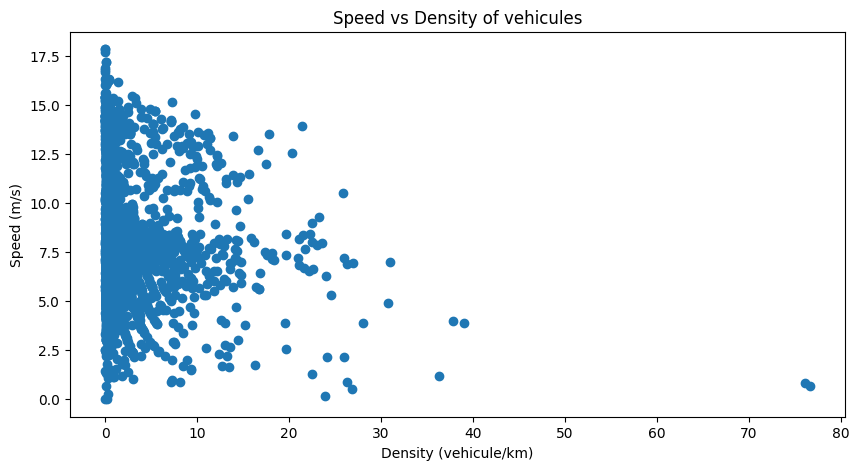

In [33]:
plt.figure(figsize=(10, 5))
plt.scatter(df['density'], df['speed'])
plt.xlabel('Density (vehicule/km)')
plt.ylabel('average Speed (m/s)')
plt.title('Average Speed vs Density of vehicules')
plt.show()


edge {'id': '-100018134#0'}
edge {'id': '-100018134#1'}
edge {'id': '-1001094023'}
edge {'id': '-1001106251#0'}
edge {'id': '-1001106251#1'}
edge {'id': '-1001144919'}
edge {'id': '-1001144920'}
edge {'id': '-100612596#0'}
edge {'id': '-100612596#1'}
edge {'id': '-100612596#2'}
edge {'id': '-100612596#3'}
edge {'id': '-100612596#4'}
edge {'id': '-100612596#5'}
edge {'id': '-100612596#6'}
edge {'id': '-100612596#7'}
edge {'id': '-1020500179'}
edge {'id': '-1020500384'}
edge {'id': '-1020500385#0'}
edge {'id': '-1020500385#1'}
edge {'id': '-1020500385#2'}
edge {'id': '-1024105863'}
edge {'id': '-102795373'}
edge {'id': '-1028388888'}
edge {'id': '-102995412'}
edge {'id': '-1037986847'}
edge {'id': '-1041085657#0'}
edge {'id': '-1041085657#1'}
edge {'id': '-104414427'}
edge {'id': '-104414445#0'}
edge {'id': '-104414445#1'}
edge {'id': '-104414445#2'}
edge {'id': '-105042296#0'}
edge {'id': '-105042296#1'}
edge {'id': '-105042296#2'}
edge {'id': '-105061387#0'}
edge {'id': '-105061387#1'}

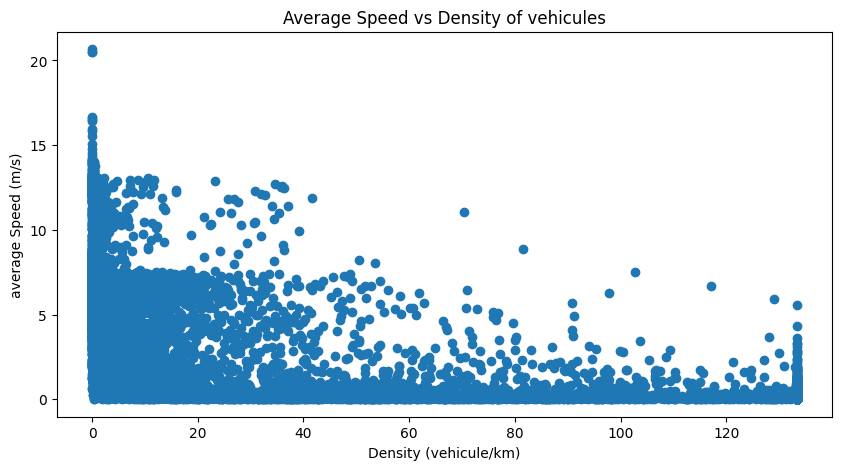

In [2]:
import requests
import os
import xml.etree.ElementTree as ET
import json
import pandas as pd
import matplotlib.pyplot as plt
#read lanedataXXX.xml file

tree = ET.parse("laneData.xml")
root = tree.getroot()
edge_data = []

for edge in root.findall('edge'):
    edge_data.append(edge.attrib)

# get all atrributes from root

for child in root.iter("edge"):
     print(child.tag, child.attrib)


lane_data = []
for edge in root.iter('edge'):
    for lane in edge.iter('lane'):
        lane_data.append(lane.attrib)

df = pd.DataFrame(lane_data)
numeric_cols = ['sampledSeconds', 'traveltime', 'overlapTraveltime', 'density', 'laneDensity', 'occupancy', 'waitingTime', 'timeLoss', 'speed', 'speedRelative', 'departed', 'arrived', 'entered', 'left', 'laneChangedFrom', 'laneChangedTo']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)
df.dtypes
mean_speed = df['speed'].mean()
max_density = df['density'].max()

print(f'Mean average speed: {mean_speed:.2f} m/s')
print(f'Maximum density: {max_density:.2f} veh/km')
plt.figure(figsize=(10, 5))
plt.scatter(df['density'], df['speed'])
plt.xlabel('Density (vehicule/km)')
plt.ylabel('average Speed (m/s)')
plt.title('Average Speed vs Density of vehicules')
plt.show()


edge {'id': '-100018134#0'}
edge {'id': '-100018134#1'}
edge {'id': '-1001094023'}
edge {'id': '-1001106251#0'}
edge {'id': '-1001106251#1'}
edge {'id': '-1001144919'}
edge {'id': '-1001144920'}
edge {'id': '-100612596#0'}
edge {'id': '-100612596#1'}
edge {'id': '-100612596#2'}
edge {'id': '-100612596#3'}
edge {'id': '-100612596#4'}
edge {'id': '-100612596#5'}
edge {'id': '-100612596#6'}
edge {'id': '-100612596#7'}
edge {'id': '-1020500179'}
edge {'id': '-1020500384'}
edge {'id': '-1020500385#0'}
edge {'id': '-1020500385#1'}
edge {'id': '-1020500385#2'}
edge {'id': '-1024105863'}
edge {'id': '-102795373'}
edge {'id': '-1028388888'}
edge {'id': '-102995412'}
edge {'id': '-1037986847'}
edge {'id': '-1041085657#0'}
edge {'id': '-1041085657#1'}
edge {'id': '-104414427'}
edge {'id': '-104414445#0'}
edge {'id': '-104414445#1'}
edge {'id': '-104414445#2'}
edge {'id': '-105042296#0'}
edge {'id': '-105042296#1'}
edge {'id': '-105042296#2'}
edge {'id': '-105061387#0'}
edge {'id': '-105061387#1'}

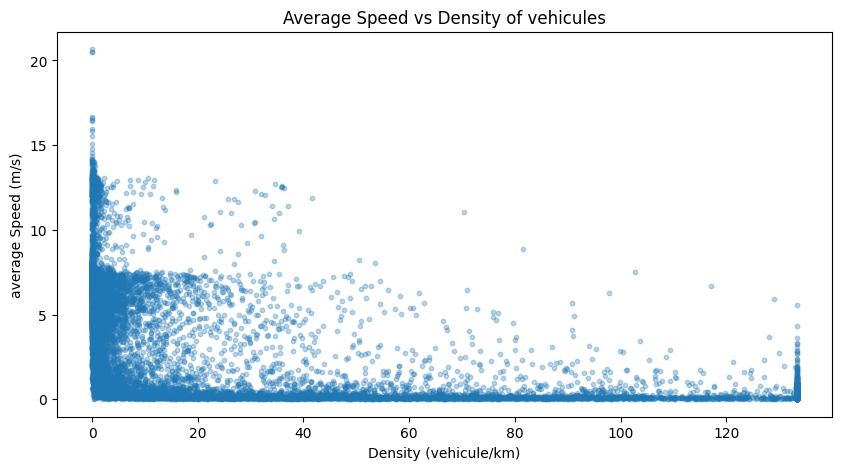

In [4]:
import requests
import os
import xml.etree.ElementTree as ET
import json
import pandas as pd
import matplotlib.pyplot as plt
#read lanedataXXX.xml file

tree = ET.parse("laneData.xml")
root = tree.getroot()
edge_data = []

for edge in root.findall('edge'):
    edge_data.append(edge.attrib)

# get all atrributes from root

for child in root.iter("edge"):
     print(child.tag, child.attrib)


lane_data = []
for edge in root.iter('edge'):
    for lane in edge.iter('lane'):
        lane_data.append(lane.attrib)

df = pd.DataFrame(lane_data)
numeric_cols = ['sampledSeconds', 'traveltime', 'overlapTraveltime', 'density', 'laneDensity', 'occupancy', 'waitingTime', 'timeLoss', 'speed', 'speedRelative', 'departed', 'arrived', 'entered', 'left', 'laneChangedFrom', 'laneChangedTo']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)
df.dtypes
mean_speed = df['speed'].mean()
max_density = df['density'].max()

print(f'Mean average speed: {mean_speed:.2f} m/s')
print(f'Maximum density: {max_density:.2f} veh/km')
plt.figure(figsize=(10, 5))

# Create alpha scatter plot
plt.scatter(df['density'], df['speed'], alpha=0.3, s=10)

plt.xlabel('Density (vehicule/km)')
plt.ylabel('average Speed (m/s)')
plt.title('Average Speed vs Density of vehicules')
plt.show()


# Amount of vehicle at each time step

In [1]:
import xml.etree.ElementTree as ET


tree = ET.parse('../rerouter_experiment/fcd.xml')
root = tree.getroot()


timedata = []

counter = 0

for i, timestep in enumerate(root.iter('timestep')):
    # Count the number of vehicle elements in the current timestep
    num_vehicles = len(timestep.findall('vehicle'))
    # Store the count in timedata at the correct index
    timedata.append(num_vehicles)

    if counter == 1500:
        break

print(timedata)


: 

: 

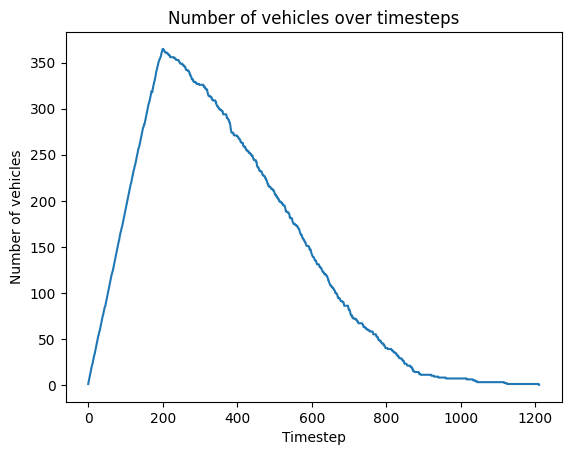

In [ ]:
import matplotlib.pyplot as plt

plt.figure()


x_values = list(range(len(timedata)))

plt.plot(x_values, timedata)

# Label the axes
plt.xlabel('Timestep')
plt.ylabel('Number of vehicles')


plt.title('Number of vehicles over timesteps')
plt.savefig("nb_vehicules.png")
plt.show()
